# Nilearn first steps
Here, we are taking our first steps with nilearn by using a toy dataset to extract roi-wise time series and then compute a correlation matrix.

We got some of the code from [here](https://nilearn.github.io/stable/auto_examples/03_connectivity/plot_signal_extraction.html#sphx-glr-auto-examples-03-connectivity-plot-signal-extraction-py)

## Loading the dataset and atlas

In [2]:
from nilearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# getting an atlas
dataset = datasets.fetch_atlas_harvard_oxford("cort-maxprob-thr25-2mm")
atlas_filename = dataset.maps
labels = dataset.labels

print(f"Atlas ROIs are located in nifti image (4D) at: {atlas_filename}")

# loading 10 subjects of brain development fMRI data
data = datasets.fetch_development_fmri(n_subjects=10, reduce_confounds=True)
# getting paths to their fmri files
fmri_filenames = data.func
# getting paths tp their confounds files
reduced_confounds = data.confounds  # This is a preselected set of confounds
len(labels) # this is 49, 48 rgeions and one background part

Atlas ROIs are located in nifti image (4D) at: 
<class 'nibabel.nifti1.Nifti1Image'>
data shape (91, 109, 91)
affine:
[[   2.    0.    0.  -90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 2. 2. 2. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform

49

In [3]:
# checking our confound table
confs = pd.read_csv(reduced_confounds[3], sep = '\t')
confs.columns

Index(['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z',
       'framewise_displacement', 'a_comp_cor_00', 'a_comp_cor_01',
       'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05',
       'csf', 'white_matter'],
      dtype='object')

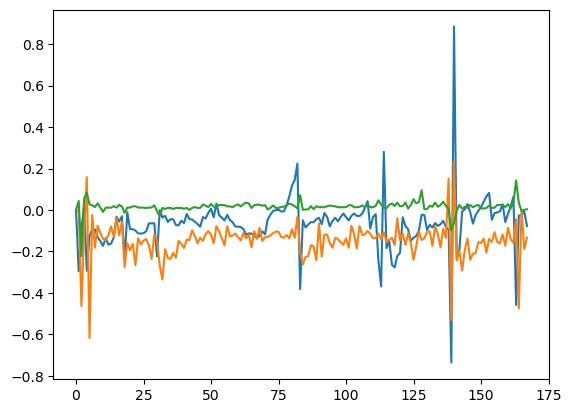

In [4]:
# plotting some motion confounds
plt.plot(confs.trans_z)
plt.plot(confs.trans_y)
plt.plot(confs.trans_x)

# plt.plot(confs.framewise_displacement)

## Short interlude: playground for lists

In [7]:
# creating an empty list
our_list = []
# filling it with Pizza and Drinks by using append repeatedly
# TODO make this nicer by using a for loop
our_list.append('Pizza')
our_list.append('Drinks')
our_list.append('Pizza')
our_list.append('Drinks')
our_list.append('Pizza')
our_list.append('Drinks')
our_list.append('Pizza')
our_list.append('Drinks')
print(our_list)

# we can also create this list using a loop
our_list = []
for i in range(4):
    our_list.append('Pizza')
    our_list.append('Drinks')
print(our_list)

    
# or a nested loop
our_list = []
for i in range(4):
    for item in ['Pizza', 'Drinks']:
        our_list.append(item)
print(our_list)


['Pizza', 'Drinks', 'Pizza', 'Drinks', 'Pizza', 'Drinks', 'Pizza', 'Drinks']
['Pizza', 'Drinks', 'Pizza', 'Drinks', 'Pizza', 'Drinks', 'Pizza', 'Drinks']
['Pizza', 'Drinks', 'Pizza', 'Drinks', 'Pizza', 'Drinks', 'Pizza', 'Drinks']


In [8]:
## these are doing the same thing
i = 0
for order in our_list:
    print(i, order)
    i +=1

for i, order in enumerate(our_list):
    print(i, order)

0 Pizza
1 Drinks
2 Pizza
3 Drinks
4 Pizza
5 Drinks
6 Pizza
7 Drinks
0 Pizza
1 Drinks
2 Pizza
3 Drinks
4 Pizza
5 Drinks
6 Pizza
7 Drinks


## Using the Masker object to extract signals

In [11]:
from nilearn.maskers import NiftiLabelsMasker

# initializing a Masker object. It needs an atlas to be initialized
masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
    memory="nilearn_cache",
    verbose=0, # the more verbose, the more printouts this will generate
)

# Here we go from nifti files to the signal time series in a numpy
# array. Note how we give confounds to be regressed out during signal
# extraction

# we can store time series in a list
time_series = []

# or initialize a numpy array for results
time_series = np.zeros((10, 168, 48))

# we loop over fmri_filenames and reduced_confounds and extract cleaned signals using masker.fit_transform
# according to the atlas we gave the masker object above
for i, (file_name, confound) in enumerate(zip(fmri_filenames, reduced_confounds)):
        if type(time_series) == list:
            # if time_series is a list, we want to append the results to it
            time_series.append(masker.fit_transform(file_name, confounds=confound))
        else:
            # otherwise, we expect an array that we can index
            time_series[i] = masker.fit_transform(file_name, confounds=confound)

time_series

array([[[ 637.86629114,  556.8502762 ,  629.52005541, ...,
          586.964525  ,  564.55529687,  688.07787146],
        [ 637.2581408 ,  556.52025814,  629.31817786, ...,
          587.15572296,  569.28463515,  687.88762383],
        [ 636.03258998,  555.58250231,  629.05611106, ...,
          587.48684526,  571.04694983,  688.17218286],
        ...,
        [ 636.61599244,  556.93581155,  629.04235579, ...,
          588.64210247,  573.75196285,  684.63372235],
        [ 636.60676464,  555.78829235,  628.87979792, ...,
          588.10102947,  574.60389474,  686.17902466],
        [ 637.44251729,  556.90267798,  629.16918154, ...,
          588.93552904,  572.60065902,  684.83377743]],

       [[1296.25109081,  687.40710564, 1274.3764963 , ...,
          654.95548641,  564.31679569,  629.69405188],
        [1295.00416598,  685.63916153, 1280.65544676, ...,
          655.75855261,  564.79515954,  632.15881825],
        [1284.71337345,  683.71184856, 1268.51723577, ...,
          654.

In [12]:
# checking the shape of our extracted timeseries
# for array:
time_series.shape
# for list:
# time_series[0].shape

(10, 168, 48)

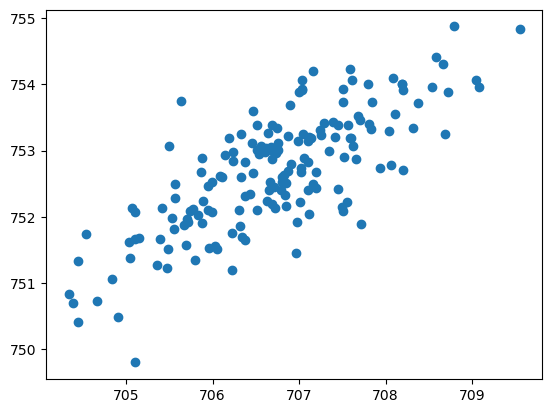

In [14]:
# correlating time series from two neighbouring regions
plt.scatter(time_series[0].T[5], time_series[0].T[4])

## Producing and plotting a connectivity matrix using ConnectivityMeasure

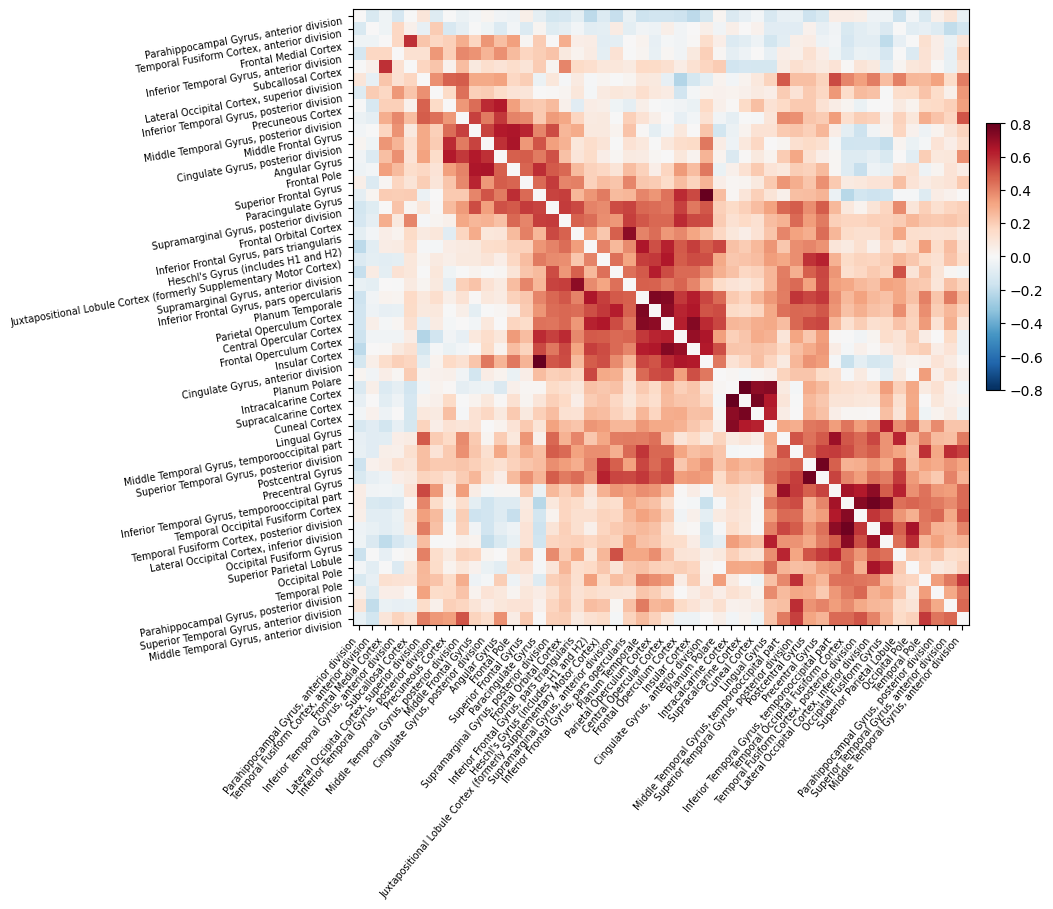

In [32]:
from nilearn.connectome import ConnectivityMeasure

# intializing the ConnectivityMeasure object
correlation_measure = ConnectivityMeasure(
    kind="correlation",
#     standardize="zscore_sample",
)

# get the correlation matrix out
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Plot the correlation matrix
import numpy as np
from nilearn import plotting

# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(
    correlation_matrix,
    figure=(10, 8),
    labels=labels[1:],
    vmax=0.8,
    vmin=-0.8,
#     title="Confounds",
    reorder=True,
)